### Animal Detector Inference

This notebook demonstrates how to use the Animal Detector which detects the animals in the frame.

#### Imports

In [1]:
import math
import onnxruntime
from PIL import Image
import numpy as np
import time
import cv2
import torch
import torchvision
from matplotlib import pyplot as plot
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
from utils.helper import *

#### Config

In [25]:
#Pre-trained model
model_path = './models/mini3s.onnx'

#Input images
# input_path = './sample_images/sample1.jpg'
input_path = './sample_images/sample2.jpg'

img_size=800 #Model expects input image of 800 x 800
stride=32

conf_thres=0.2
iou_thres=0.45
classes = [0] #What classes to detect during inference
max_det = 50 #Max detections
names = ['animal','person'] #labels, only animal supported for this version.

In [3]:
onnxruntime.get_device()

'CPU'

In [4]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
print(f'Running on {device}')

Running on cpu


#### Load model

In [7]:
#Get model
ort_session = loadModel(model_path)

#### Running detections on image

In [20]:
input_cv2_numpy_image = cv2.imread(input_path)

print(f'Input image width:{input_cv2_numpy_image.shape[1]}, height:{input_cv2_numpy_image.shape[0]}')

Input image width:1000, height:800


Running on cpu. 

Inference took 0.108 seconds.


results:([[0.0, 398.0, 56.0, 544.0], [31.0, 336.0, 287.0, 550.0], [168.0, 364.0, 432.0, 581.0], [366.0, 357.0, 620.0, 602.0], [586.0, 364.0, 935.0, 593.0]], [0.3549191951751709, 0.39418941736221313, 0.5063719153404236, 0.7553938031196594, 0.88885498046875], [0, 0, 0, 0, 0], ['animal', 'person'])


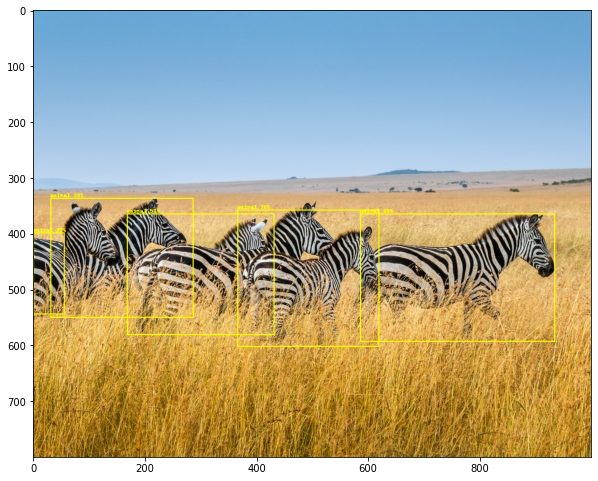

In [26]:
print(f'Running on {device}. \n')

results = processInput(model=ort_session, input_cv2_numpy_image=input_cv2_numpy_image,img_size=img_size, stride=stride, 
             conf_thres=conf_thres, iou_thres=iou_thres, classes=classes, 
             names=names, max_det=max_det, device=device)

print('\n')
print(f'results:{results}')

showPredictionPIL(input_image_path=input_path,
                  bbox_xyxy_list=results[0], conf_out_list=results[1], cls_list=results[2], names=results[3])